<!--NAVIGATION-->
< [Visualizing Errors](04.03-Errorbars.ipynb) | [Contents](Index.ipynb) | [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) >

# Density and Contour Plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

``plt.contour`` takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.

In [6]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
print(x)
X, Y = np.meshgrid(x, y)
print(X)
Z = f(X, Y)

[ 0.          0.10204082  0.20408163  0.30612245  0.40816327  0.51020408
  0.6122449   0.71428571  0.81632653  0.91836735  1.02040816  1.12244898
  1.2244898   1.32653061  1.42857143  1.53061224  1.63265306  1.73469388
  1.83673469  1.93877551  2.04081633  2.14285714  2.24489796  2.34693878
  2.44897959  2.55102041  2.65306122  2.75510204  2.85714286  2.95918367
  3.06122449  3.16326531  3.26530612  3.36734694  3.46938776  3.57142857
  3.67346939  3.7755102   3.87755102  3.97959184  4.08163265  4.18367347
  4.28571429  4.3877551   4.48979592  4.59183673  4.69387755  4.79591837
  4.89795918  5.        ]
[[ 0.          0.10204082  0.20408163 ...,  4.79591837  4.89795918  5.        ]
 [ 0.          0.10204082  0.20408163 ...,  4.79591837  4.89795918  5.        ]
 [ 0.          0.10204082  0.20408163 ...,  4.79591837  4.89795918  5.        ]
 ..., 
 [ 0.          0.10204082  0.20408163 ...,  4.79591837  4.89795918  5.        ]
 [ 0.          0.10204082  0.20408163 ...,  4.79591837  4.89795

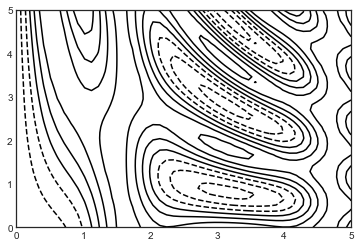

In [10]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

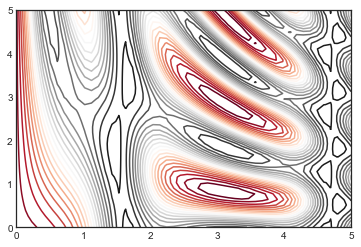

In [11]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

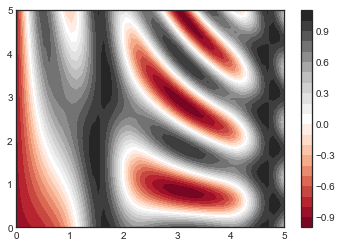

In [12]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

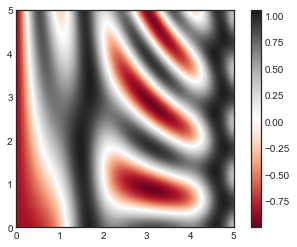

In [16]:
plt.imshow(Z, interpolation="bicubic", extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()

plt.axis(aspect='image');

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

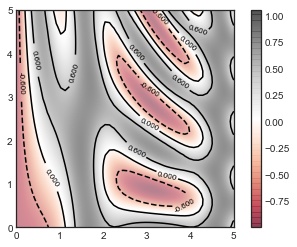

In [17]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, interpolation="bicubic", extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

<!--NAVIGATION-->
< [Visualizing Errors](04.03-Errorbars.ipynb) | [Contents](Index.ipynb) | [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) >